In [1]:
import numpy as np
import cv2
from datetime import datetime
import matplotlib.pyplot as plt

[INFO] loading model...
[INFO] Select input image ...


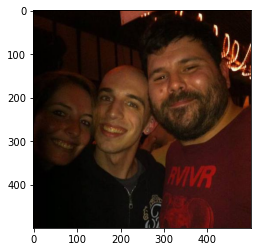

In [2]:
confThreshold = 0.5

prototxt = 'deploy.prototxt.txt'
caffemodel = 'res10_300x300_ssd_iter_140000.caffemodel'

# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(prototxt, caffemodel)
print("[INFO] Select input image ...")
inputfile = r"./data/iron_chic.jpg"

# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
image = cv2.imread(inputfile)
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
                             (300, 300), (104.0, 177.0, 123.0))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
# pass the blob through the network and obtain the detections and
# predictions
print("[INFO] computing object detections...")
net.setInput(blob)
t1 = datetime.now()  # 测试起始时间
detections = net.forward()
t2 = datetime.now()  # 测试结束时间
print('time spend for face_detection: ', t2 - t1)  # 显示总的时间开销

[INFO] computing object detections...
time spend for face_detection:  0:00:00.015663


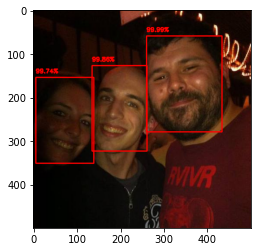

In [4]:
# loop over the detections
for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the
    # prediction
    confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > confThreshold:
        # compute the (x, y)-coordinates of the bounding box for the
        # object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # draw the bounding box of the face along with the associated
        # probability
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY),
                      (0, 0, 255), 2)
        cv2.putText(image, text, (startX, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

# show the output image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()